# About NootBook:

in this nootbook,i have used almost the techniques that every data scientist used in thier work
here is a brief look of contents:
   ~ python libraries
   ~ import imporatant libraries
   ~ handle missing value
                   ffill,bfill
                   replace
                   mood
   ~ EDA 
                   groupby
                   outliers
                   diffrent operations
   ~ visualization
                   seaborn
                   matplotlib
   ~ one-hot-encoding
   ~ feature engineering
                   seleckbest algorithm
   ~ Feature Importance
                   ExtraTreeClassiefer
   ~ algorithm:
                   DecisionTreeClassifier 
                   logistic regression


    

# Python Libraries

Python Libraries are a set of useful functions that eliminate the need for writing codes from scratch.Python libraries play a vital role in developing machine learning, data science, data visualization, image and data manipulation applications and more.

# 1-Import important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [1]:
# from google.colab import files
# uploaded  = files.upload()

In [3]:
data = pd.read_csv('aug_train.csv')
df1 = data.copy()
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Read the data from the aug_train.csv(comma separated values) file and copy in new variable 
in which head shows the first 5 rows by default we can change it if we want to see more than 5.

In [5]:
#remove unrelated columns
df = df1.drop(['enrollee_id','company_size','city','city_development_index'],axis = 1)
df.head() 

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0.0
3,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0


remove unrelated columns which does'nt make sense and have mostly raw data which have effect of results

In [6]:
df.shape

(19158, 10)

shape method tells the number of rows and columns in the data set 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
gender                 14650 non-null object
relevent_experience    19158 non-null object
enrolled_university    18772 non-null object
education_level        18698 non-null object
major_discipline       16345 non-null object
experience             19093 non-null object
company_type           13018 non-null object
last_new_job           18735 non-null object
training_hours         19158 non-null int64
target                 19158 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


info gives the overal information of the data set

In [8]:
df.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
columns tell us the attribute name of the data 

# 2-Handle Missing Value

The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.
A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic.
in which i had impute with it mode according to the nature of column

In [9]:
df.isnull().sum()

gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64

#### by using this we get to know that how many missing values our data has.that method will be easy to us to make our data clean 

In [10]:
df['gender'] = df['gender'].fillna(method = 'ffill')
df['enrolled_university'] = df['enrolled_university'].fillna(method = 'ffill')
df['education_level'] = df['education_level'].fillna(method = 'ffill')
df['major_discipline'] = df['major_discipline'].fillna(method = 'ffill')
df['company_type'] = df['company_type'].fillna(method = 'ffill')
df.head()


,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,never,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0


#### 'ffill' stands for 'forward fill' and will propagate last valid observation forward.

In [11]:
#dealing with numerical feature
df['experience'] = df['experience'].replace(['<1'],1)
df['experience'] = df['experience'].replace(['>20'],20)
df['last_new_job'] = df['last_new_job'].replace(['never'],1)
df['last_new_job'] = df['last_new_job'].replace(['>4'],4)
df['last_new_job'] = df['last_new_job'].replace(['<1'],1)
df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0.0


#### replace() function is used to replace a string, regex, list, dictionary, series, number etc.

In [12]:
df['company_type'] = df['company_type'].fillna(df['company_type'].mode()[0])
df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0.0


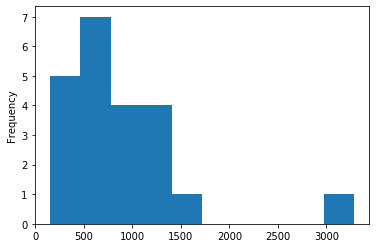

In [9]:
df['experience'].value_counts().plot(kind='hist')

this graph shows that the data is positive skewed we fill with it mode

In [13]:
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])
df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0.0


fill data with mode.
mode:most repeated value of the given data  

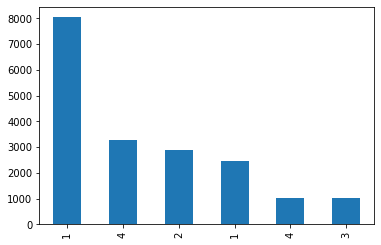

In [13]:
df['last_new_job'].value_counts().plot(kind='bar')

#this graph shows that the data is positive skewed we fill with it mode

In [14]:
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])
df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0.0


fill data with mode.
mode:most repeated value of the given data  

In [15]:
df.isnull().sum() 

gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_type           0
last_new_job           0
training_hours         0
target                 0
dtype: int64

now the data has been cleaned

In [16]:
df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0.0


# 3-EDA(exploratory data analysis)

Exploratory Data Analysis,does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format.Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling.

In [ ]:
df_most_experiencesd = df[df['training_hours'] > 30]
df_most_experiencesd.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5,Pvt Ltd,1,83,0.0
3,Male,No relevent experience,Full time course,Graduate,Business Degree,1,Pvt Ltd,1,52,1.0
8,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,1,46,1.0


#this data frame has those person whose spend most time on thier trainings to get hire

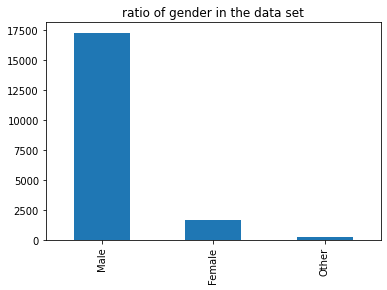

In [ ]:
plt.title("ratio of gender in the data set")
df['gender'].value_counts().plot(kind = 'bar') 

checking of the gender ratio in the whole data set
we can examine that here is a more ratio of man than female and others

# 3.1- Staistical Method Describe()

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.


In [ ]:
df.describe()

,training_hours,target
count,19158.000000,19158.000000
mean,65.366896,0.249348
std,60.058462,0.432647
min,1.000000,0.000000
25%,23.000000,0.000000
50%,47.000000,0.000000
75%,88.000000,0.000000
max,336.000000,1.000000


# 3.2 - Check the outliers

An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean. Removing outliers from a pandas. DataFrame removes any rows in the DataFrame which contain an outlier. Outlier calculations are performed separately for each column


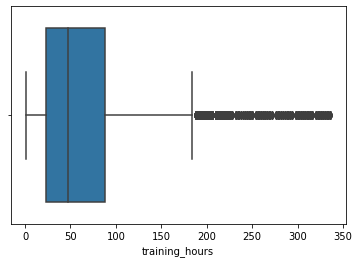

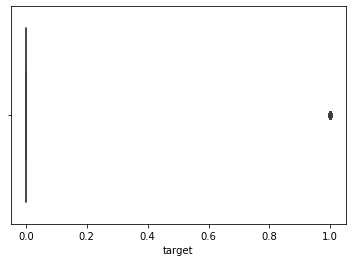

In [24]:
for i in df.describe().columns:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.dtypes

gender                  object
relevent_experience     object
enrolled_university     object
education_level         object
major_discipline        object
experience              object
company_type            object
last_new_job            object
training_hours           int64
target                 float64
dtype: object

dtypes: it show the data type of each column by doing this we can apply dummy easily on object data types 

# 4-Data Visualization

Data visualization basically refers to the graphical or. visual representation of information and data using. visual elements like charts, graphs, maps, etc.Charts are often used to ease understanding of large quantities. of data and the relationships between parts of the data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


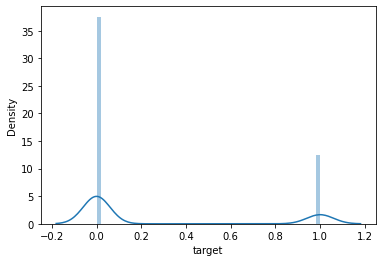

In [ ]:
sns.distplot(df.target)

check the number of hiring of employees 0 meant not hire 1 for higher 

In [16]:
male_exp = df[(df['gender'] == 'Male') & (df['education_level'] == 'Masters') & (df['target'] == 1)]
female_exp = df[(df['gender'] == 'Female') & (df['education_level'] == 'Masters') &(df['target'] == 1)]
print(male_exp.education_level.value_counts())
print(female_exp.education_level.value_counts())
#

Masters    833
Name: education_level, dtype: int64
Masters    117
Name: education_level, dtype: int64


males have masters degree more than females
those who have master degree have most chance to get higherd

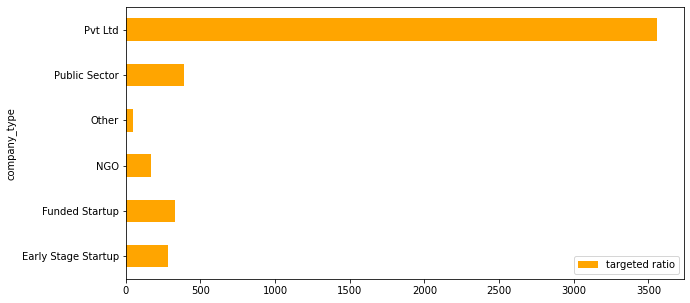

In [ ]:
company = df.groupby(['company_type']).sum().plot(kind = 'barh',y = 'target',figsize=(10,5),color = "orange",label = "targeted ratio")
company  


this graph shows that pvt_ltd higher more emloyees than other companies

In [ ]:
pvt_gen_male = df[(df['company_type'] == 'Pvt Ltd') & (df['gender'] == 'Male') & (df['target'] == 1)].value_counts().sum()
pvt_gen_female = df[(df['company_type'] == 'Pvt Ltd') & (df['gender'] == 'Female') & (df['target'] == 1)].value_counts().sum()
pvt_gen_other =  df[(df['company_type'] == 'Pvt Ltd') & (df['gender'] == 'Other') & (df['target'] == 1)].value_counts().sum()
print("male achive target",pvt_gen_male)
print("female achive target",pvt_gen_female)
print("others achieve target",pvt_gen_other)


male achive target 3181
female achive target 327
others achieve target 51


ratio of no of employees(gender basis) that higher pvt_ltd

In [ ]:
find_max = {'male': pvt_gen_male,
          'female': pvt_gen_female,
          'other': pvt_gen_other,
          }
s = pd.Series(find_max)
s

male      3181
female     327
other       51
dtype: int64

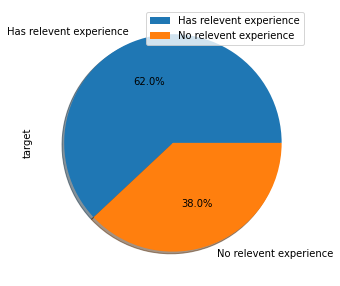

In [ ]:
grou = df.groupby(['relevent_experience']).sum().plot(kind = 'pie',y = 'target',figsize=(10,5),autopct='%1.1f%%',shadow = True)
grou 

#this graph shows that the person who have relavent experience are highered more than the number of person who have NO relavant experience

In [ ]:
df.head(2)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Pvt Ltd,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0.0


# 5-One Hot Encode

one hot encoding:It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed

In [31]:
df_one_hot = pd.get_dummies(df,columns = ['gender','company_type','relevent_experience','enrolled_university','education_level','major_discipline'])
df_one_hot.head() 

,experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,...,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,20,1,36,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15,4,47,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1,83,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,52,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20,4,8,0.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
df_one_hot.shape

(19158, 29)

# 6-Feature Enginerring

Feature Engineering is the way of extracting features from data and transforming them into formats that are suitable for Machine Learning algorithms.there are many techniques of feature engenneing.here i use selectkbest algorithm to achive my strongly corelated feature with targeted feature  

# 6.1 - SelectKBest:

SelectKBest then simply retains the first k features of X with the highest scores. So, for example, if pass chi2 as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels).A large score suggests that the means of the K groups are not all equal.


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKBest is an algorithm.we use it for the best predictors for the target variable.

In [20]:
x = df_one_hot.drop(['target'],axis = 1)
y = df_one_hot['target'] 

In [21]:
feature_ranking = SelectKBest(score_func = chi2 ,k =28)
order_of_feature = feature_ranking.fit(x,y)

In [22]:
df_hour  = pd.DataFrame(order_of_feature.scores_ ,columns = ['score'])
df_colum = pd.DataFrame(x.columns) 

In [23]:
feature = pd.concat([df_colum,df_hour],axis = 1)
feature.columns = ['feature','score']
feature.head()

,feature,score
0,experience,2465.476397
1,last_new_job,96.588291
2,training_hours,492.164428
3,gender_Female,8.881259
4,gender_Male,1.141936


it tells that which input feature has strong realtionship with targted feature

In [24]:
feature.nlargest(10,'score')

,feature,score
0,experience,2465.476397
2,training_hours,492.164428
14,enrolled_university_Full time course,340.225613
13,relevent_experience_No relevent experience,227.490477
1,last_new_job,96.588291
16,enrolled_university_no_enrollment,94.356868
12,relevent_experience_Has relevent experience,88.508839
17,education_level_Graduate,53.562556
19,education_level_Masters,29.970546
18,education_level_High School,28.772037


These feature haas high corelated to targeted feature. more the score, more corelted feature taken for the input 

# 7-Feature Importance

it is another of feature selection.Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.
higher the bar means highely correlated to the targeted feature.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x,y)

E:\new machine install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset.it uses averaging to improve the predictive accuracy and control over-fitting

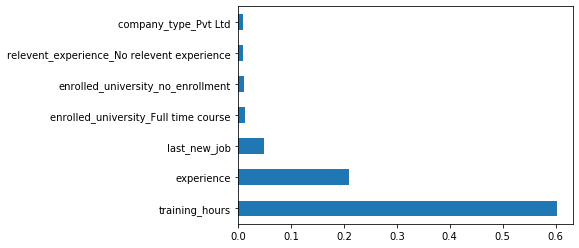

In [26]:
ranked_feature = pd.Series(etc.feature_importances_,index = x.columns)
ranked_feature.nlargest(7).plot(kind = 'barh')
plt.show()

# 8- Apply Algorithms



# 8.1-Decision Tree Algorithm


Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).


In [32]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()


# 8.2-Take input feature

In [33]:
inp = ['experience','training_hours','last_new_job','enrolled_university_Full time course','relevent_experience_Has relevent experience']

In [34]:
X = df_one_hot[inp] #input variable 
Y = df_one_hot['target'] #targeted variable



Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes.The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.


In [35]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest = train_test_split(X,Y, test_size = 0.3,random_state = 45,shuffle = True)

# 8.3-Standard scaler


StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers(if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#transform the train set
xtrain = scaler.fit_transform(xtrain)
#transform the xtest
xtest = scaler.transform(xtest)

# 8.4-Fitting the DecisionTreeClassifier


In [37]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ouput shows that,it worked on the gini creteria 
Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chose 

In [47]:
# from IPython.display import Image 
# Image("gini.png")

In [38]:
pred = DT.predict(xtest)
pred[1:4]

array([0., 0., 0.])

# 8.5-Check accuracy of the model

It is the ratio of number of correct predictions to the total number of input samples.


In [39]:
from sklearn.metrics import accuracy_score
DT_acuuracy = accuracy_score(ytest,pred)
DT_acuuracy

0.6818023660403618

we increaese our accuracy score by applying hyperparameter tunning techniques.which tune algorithm and give best results.
we can tune all the algorithm according to thier paramter 

# 8.6-logistic regression algorithm


Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.
formula:The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it's often close to either 0 or 1


In [43]:
#logistic regression
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(solver = 'sag',penalty='l2')

Logistic Regression CV classifier. This class implements logistic regression using liblinear, newton-cg or LBFGS,sag,saga optimizer in which i used sag solver which give me the best results with penalty l2

In [46]:
lr.fit(X,Y)
lr_pred = lr.predict(xtest)

E:\new machine install\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\new machine install\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\new machine install\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\new machine install\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\new machine install\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached 

# 8.8-Accuracy

Accuracy is the proportion of correct predictions over total predictions. This is how we can find the accuracy with logistic regression

In [45]:
from sklearn.metrics import accuracy_score
lr_acuuracy = accuracy_score(ytest,lr_pred)
lr_acuuracy

0.7433890048712596